# pytorch入门学习

## 1. numpy torch 对比

###  numpy 和 torch相互转换

In [1]:
import numpy as np
import torch

#numpy 和 torch相互转换
np_data = np.arange(6).reshape((2, 3))
torch_data = torch.from_numpy(np_data)
tensor2array = torch_data.numpy()

print(
    '\nnumpy array:', np_data,          # [[0 1 2], [3 4 5]]
    '\ntorch tensor:', torch_data,      #  0  1  2 \n 3  4  5    [torch.LongTensor of size 2x3]
    '\ntensor to array:', tensor2array, # [[0 1 2], [3 4 5]]
)





numpy array: [[0 1 2]
 [3 4 5]] 
torch tensor: tensor([[0, 1, 2],
        [3, 4, 5]]) 
tensor to array: [[0 1 2]
 [3 4 5]]


### 一般数值运算

In [4]:
torch.version

<module 'torch.version' from '/home/jdm/miniconda3/lib/python3.7/site-packages/torch/version.py'>

In [401]:
# data = [-1, -2, 1, 2]
tensor = torch.FloatTensor(data)  # 转换成32位浮点 tensor
print(
    '\nabs',
    '\nnumpy: ', np.abs(data),          # [1 2 1 2]
    '\ntorch: ', torch.abs(tensor)      # [1 2 1 2]
)

# sin   三角函数 sin
print(
    '\nsin',
    '\nnumpy: ', np.sin(data),      # [-0.84147098 -0.90929743  0.84147098  0.90929743]
    '\ntorch: ', torch.sin(tensor)  # [-0.8415 -0.9093  0.8415  0.9093]
)

# mean  均值
print(
    '\nmean',
    '\nnumpy: ', np.mean(data),         # 0.0
    '\ntorch: ', torch.mean(tensor)     # 0.0
)


abs 
numpy:  [[1 2]
 [3 4]] 
torch:  tensor([[1., 2.],
        [3., 4.]])

sin 
numpy:  [[ 0.84147098  0.90929743]
 [ 0.14112001 -0.7568025 ]] 
torch:  tensor([[ 0.8415,  0.9093],
        [ 0.1411, -0.7568]])

mean 
numpy:  2.5 
torch:  tensor(2.5000)


### 矩阵运算 

In [402]:
# matrix multiplication torch.mm 矩阵点乘
data = [[1,2], [3,4]]
tensor = torch.FloatTensor(data)  # 转换成32位浮点 tensor
# correct method
print(
    '\nmatrix multiplication (matmul)',
    '\nnumpy: ', np.matmul(data, data),     # [[7, 10], [15, 22]]
    '\ntorch: ', torch.mm(tensor, tensor)   # [[7, 10], [15, 22]]
)



# torch.squeeze(input, dim=None, out=None) 将输入张量形状中的1 去除并返回。 如果输入是形如(A×1×B×1×C×1×D)，那么输出形状就为： (A×B×C×D)
# 当给定dim时，那么挤压操作只在给定维度上
x = torch.zeros(2,1,2,1,2)
x.size()  #(2L, 1L, 2L, 1L, 2L)
y = torch.squeeze(x)
y.size() #(2L, 2L, 2L)
y = torch.squeeze(x, 0) #(2L, 1L, 2L, 1L, 2L)
y = torch.squeeze(x, 1) #(2L, 2L, 1L, 2L)



#torch.t 矩阵转置
x = torch.randn(2, 3)
x, torch.t(x)



# torch.rand(*size) ,torch.randn(*sizes, out=None) 随机数
torch.rand(2,2) #（0，1）均匀分布
torch.randn(2,2) #(0,1)均值0，方差1的正态分布


#torch.normal(means, std, out=None) 从给定参数means,std的离散正态分布中抽取随机数
#     means (Tensor) – 均值
#     std (Tensor) – 标准差
#     out (Tensor) – 可选的输出张量




#torch.cat(inputs, dimension=0)可以看做 torch.split() 和 torch.chunk()的反操作
x = torch.randn(2,3)
#  0.5983 -0.0341  2.4918
#  1.5981 -0.5265 -0.8735
torch.cat((x, x, x), 0)
#  0.5983 -0.0341  2.4918
#  1.5981 -0.5265 -0.8735
#  0.5983 -0.0341  2.4918
#  1.5981 -0.5265 -0.8735
#  0.5983 -0.0341  2.4918
#  1.5981 -0.5265 -0.8735
torch.cat((x, x, x), 1)
#  0.5983 -0.0341  2.4918  0.5983 -0.0341  2.4918  0.5983 -0.0341  2.4918
#  1.5981 -0.5265 -0.8735  1.5981 -0.5265 -0.8735  1.5981 -0.5265 -0.8735


matrix multiplication (matmul) 
numpy:  [[ 7 10]
 [15 22]] 
torch:  tensor([[ 7., 10.],
        [15., 22.]])


tensor([[-0.7343,  0.5413,  0.2543, -0.7343,  0.5413,  0.2543, -0.7343,  0.5413,
          0.2543],
        [-1.2790, -0.5247,  1.4380, -1.2790, -0.5247,  1.4380, -1.2790, -0.5247,
          1.4380]])

## CUDA Tensors计算

In [403]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

tensor([[ 0.2657,  1.5413,  1.2543],
        [-0.2790,  0.4753,  2.4380]], device='cuda:0')
tensor([[ 0.2657,  1.5413,  1.2543],
        [-0.2790,  0.4753,  2.4380]], dtype=torch.float64)


## Autograd 自动微分

创建一个Tensor时，使用requires_grad参数指定是否记录对其的操作，以便之后利用backward()方法进行梯度求解。

一个Tensor的requires_grad成员保存该Tensor是否记录操作用于计算梯度。

可利用requires_grad_()方法修改Tensor的requires_grad属性（in place）

通过运算创建的Tensor，会自动被赋值grad_fn属性。该属性表示梯度函数。

最后得到的Tensor执行自身的backward()函数，此时之前参与运算并生成当前Tensor的叶子（leaf）Tensor将会保存其梯度在叶子Tensor的grad属性中。backward()函数接受参数，表示在特定位置求梯度值，该参数应和调用backward()函数的Tensor的维度相同，或者是可broadcast的维度。默认为torch.tensor(1)，也就是在当前梯度为标量1的位置求叶子Tensor的梯度。

默认同一个运算得到的Tensor仅能进行一次backward()。再次运算得到的Tesnor，可以再次进行backward()。

当多个Tensor从相同的源Tensor运算得到，这些运算得到的Tensor的backwards()方法将向源Tensor的grad属性中进行数值累加。




In [3]:

##  requires_grad=True
x = torch.ones(2, 2, requires_grad=True)
# tensor([[1., 1.],
#         [1., 1.]], requires_grad=True)
y = x + 2
# tensor([[3., 3.],
#         [3., 3.]], grad_fn=<AddBackward0>)
y.grad_fn
# <AddBackward0 at 0x7fbc0a1e99b0>
z = y * y * 3
# tensor([[27., 27.],
#         [27., 27.]], grad_fn=<MulBackward0>)
out = z.mean()
# tensor(27., grad_fn=<MeanBackward1>)

##  Gradients
out.backward()
print(x.grad)
# tensor([[4.5000, 4.5000],
#         [4.5000, 4.5000]])


# vector-Jacobian product
x = torch.randn(3, requires_grad=True)
y = x * 2
while y.data.norm() < 100000: #求平方和即方差
    y = y * 2
print(y)
# tensor([-489.0234, -789.4935, -870.9390], grad_fn=<MulBackward0>)
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)
# tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])
tensor([ 29855.6582, 183568.5625,   9217.3760], grad_fn=<MulBackward0>)
tensor([2.6214e+04, 2.6214e+05, 2.6214e+01])


## Neural Networks 


Define the neural network that has some learn able parameters (or weights)

Iterate over a dataset of inputs

Process input through the network

Compute the loss (how far is the output from being correct)

Propagate gradients back into the network’s parameters

Update the weights of the network, typically using a simple update rule: weight = weight - learning_rate * gradient


### 调用模块

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F #定义激励函数

### 激励函数形式

In [43]:
### 激励函数


x = torch.linspace(-5, 5, 200)
x_np = x.numpy() 

y_relu = F.relu(x).numpy()
y_sigmoid = F.sigmoid(x).numpy()
y_tanh = torch.tanh(x).numpy()
y_softplus = F.softplus(x).numpy()
# y_softmax = F.softmax(x)  softmax 比较特殊, 不能直接显示, 不过他是关于概率的, 用于分类

import matplotlib.pyplot as plt
plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

AttributeError: 'ReLU' object has no attribute 'numpy'

### 建立神经网络  抛物线拟合

In [35]:
# 拟合 y = a * x^2 + b
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)#x.requires_grad_(True)

##建立神经网络 抛物线拟合

class Net(nn.Module): # 继承 torch 的 Module
    
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()     # 继承 __init__ 功能
        # 定义每层用什么样的形式
        self.hidden = nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.hidden2 = nn.Linear(n_hidden, n_hidden)
        self.predict = nn.Linear(n_hidden, n_output)   # 输出层线性输出
    
    def forward(self, x):   # 这同时也是 Module 中的 forward 功能
        # 正向传播输入值, 神经网络分析出输出值
        x = F.sigmoid(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = F.sigmoid(self.hidden2(x))
        x = self.predict(x)             # 输出值
        return x
    
net = Net(n_feature=1, n_hidden=10, n_output=1)
print(net)  


Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (hidden2): Linear(in_features=10, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


## 训练网络

tensor(0.1005, grad_fn=<MseLossBackward>)


/home/jdm/miniconda3/lib/python3.7/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


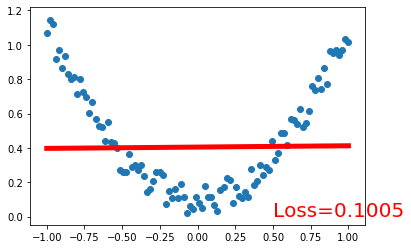

tensor(2.1393, grad_fn=<MseLossBackward>)
tensor(0.2257, grad_fn=<MseLossBackward>)
tensor(0.2608, grad_fn=<MseLossBackward>)
tensor(0.5446, grad_fn=<MseLossBackward>)
tensor(0.5198, grad_fn=<MseLossBackward>)


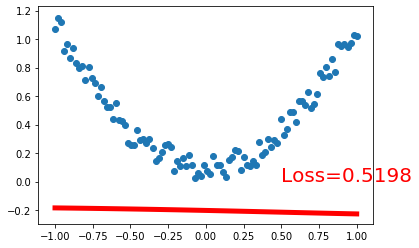

tensor(0.3791, grad_fn=<MseLossBackward>)
tensor(0.2606, grad_fn=<MseLossBackward>)
tensor(0.1846, grad_fn=<MseLossBackward>)
tensor(0.1381, grad_fn=<MseLossBackward>)
tensor(0.1115, grad_fn=<MseLossBackward>)


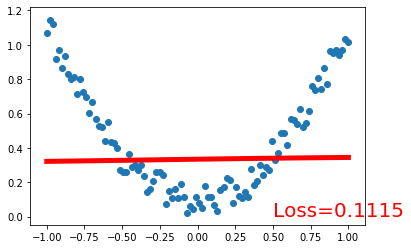

tensor(0.1002, grad_fn=<MseLossBackward>)
tensor(0.1005, grad_fn=<MseLossBackward>)
tensor(0.1085, grad_fn=<MseLossBackward>)
tensor(0.1203, grad_fn=<MseLossBackward>)
tensor(0.1321, grad_fn=<MseLossBackward>)


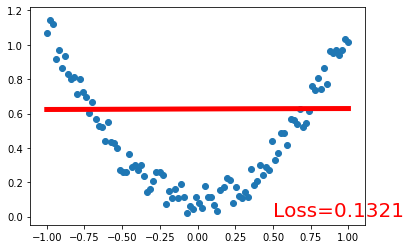

tensor(0.1409, grad_fn=<MseLossBackward>)
tensor(0.1451, grad_fn=<MseLossBackward>)
tensor(0.1442, grad_fn=<MseLossBackward>)
tensor(0.1388, grad_fn=<MseLossBackward>)
tensor(0.1303, grad_fn=<MseLossBackward>)


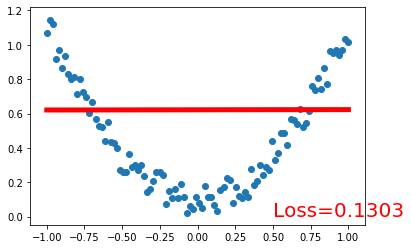

tensor(0.1207, grad_fn=<MseLossBackward>)
tensor(0.1116, grad_fn=<MseLossBackward>)
tensor(0.1045, grad_fn=<MseLossBackward>)
tensor(0.1002, grad_fn=<MseLossBackward>)
tensor(0.0989, grad_fn=<MseLossBackward>)


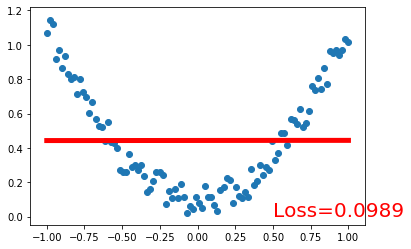

tensor(0.1001, grad_fn=<MseLossBackward>)
tensor(0.1030, grad_fn=<MseLossBackward>)
tensor(0.1065, grad_fn=<MseLossBackward>)
tensor(0.1094, grad_fn=<MseLossBackward>)
tensor(0.1112, grad_fn=<MseLossBackward>)


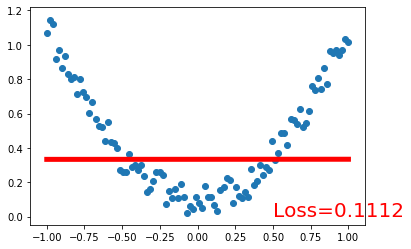

tensor(0.1113, grad_fn=<MseLossBackward>)
tensor(0.1100, grad_fn=<MseLossBackward>)
tensor(0.1076, grad_fn=<MseLossBackward>)
tensor(0.1047, grad_fn=<MseLossBackward>)
tensor(0.1020, grad_fn=<MseLossBackward>)


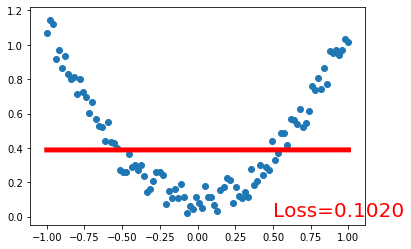

tensor(0.1000, grad_fn=<MseLossBackward>)
tensor(0.0990, grad_fn=<MseLossBackward>)
tensor(0.0989, grad_fn=<MseLossBackward>)
tensor(0.0997, grad_fn=<MseLossBackward>)
tensor(0.1007, grad_fn=<MseLossBackward>)


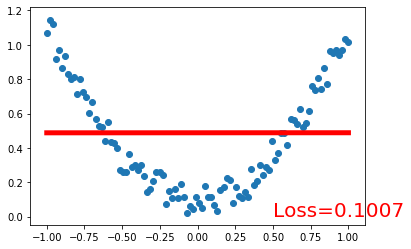

tensor(0.1018, grad_fn=<MseLossBackward>)
tensor(0.1025, grad_fn=<MseLossBackward>)
tensor(0.1027, grad_fn=<MseLossBackward>)
tensor(0.1023, grad_fn=<MseLossBackward>)
tensor(0.1015, grad_fn=<MseLossBackward>)


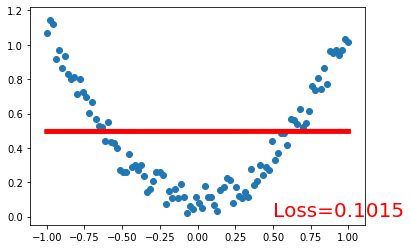

tensor(0.1005, grad_fn=<MseLossBackward>)
tensor(0.0997, grad_fn=<MseLossBackward>)
tensor(0.0991, grad_fn=<MseLossBackward>)
tensor(0.0989, grad_fn=<MseLossBackward>)
tensor(0.0990, grad_fn=<MseLossBackward>)


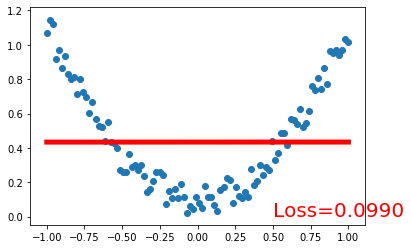

tensor(0.0993, grad_fn=<MseLossBackward>)
tensor(0.0997, grad_fn=<MseLossBackward>)
tensor(0.1000, grad_fn=<MseLossBackward>)
tensor(0.1001, grad_fn=<MseLossBackward>)
tensor(0.1000, grad_fn=<MseLossBackward>)


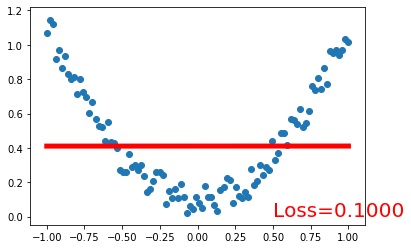

tensor(0.0997, grad_fn=<MseLossBackward>)
tensor(0.0994, grad_fn=<MseLossBackward>)
tensor(0.0991, grad_fn=<MseLossBackward>)
tensor(0.0989, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)


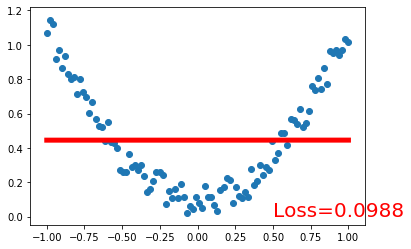

tensor(0.0989, grad_fn=<MseLossBackward>)
tensor(0.0990, grad_fn=<MseLossBackward>)
tensor(0.0992, grad_fn=<MseLossBackward>)
tensor(0.0993, grad_fn=<MseLossBackward>)
tensor(0.0993, grad_fn=<MseLossBackward>)


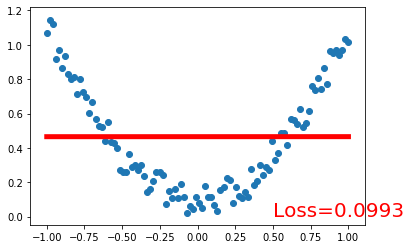

tensor(0.0992, grad_fn=<MseLossBackward>)
tensor(0.0991, grad_fn=<MseLossBackward>)
tensor(0.0990, grad_fn=<MseLossBackward>)
tensor(0.0989, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)


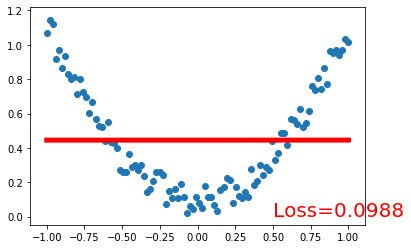

tensor(0.0989, grad_fn=<MseLossBackward>)
tensor(0.0989, grad_fn=<MseLossBackward>)
tensor(0.0990, grad_fn=<MseLossBackward>)
tensor(0.0990, grad_fn=<MseLossBackward>)
tensor(0.0990, grad_fn=<MseLossBackward>)


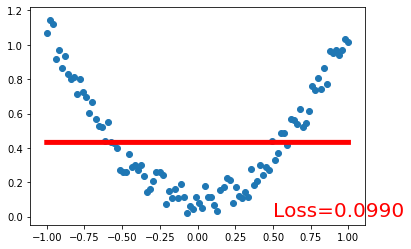

tensor(0.0990, grad_fn=<MseLossBackward>)
tensor(0.0989, grad_fn=<MseLossBackward>)
tensor(0.0989, grad_fn=<MseLossBackward>)
tensor(0.0989, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)


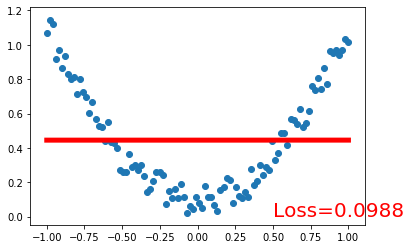

tensor(0.0989, grad_fn=<MseLossBackward>)
tensor(0.0989, grad_fn=<MseLossBackward>)
tensor(0.0989, grad_fn=<MseLossBackward>)
tensor(0.0989, grad_fn=<MseLossBackward>)
tensor(0.0989, grad_fn=<MseLossBackward>)


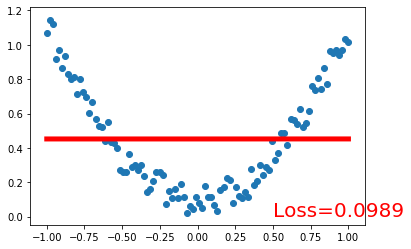

tensor(0.0989, grad_fn=<MseLossBackward>)
tensor(0.0989, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)


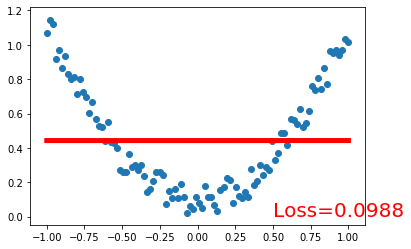

tensor(0.0989, grad_fn=<MseLossBackward>)
tensor(0.0989, grad_fn=<MseLossBackward>)
tensor(0.0989, grad_fn=<MseLossBackward>)
tensor(0.0989, grad_fn=<MseLossBackward>)
tensor(0.0989, grad_fn=<MseLossBackward>)


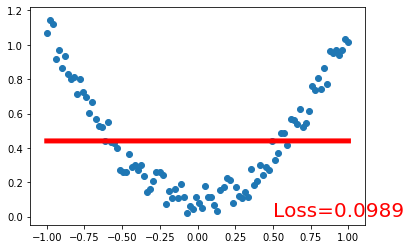

tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)


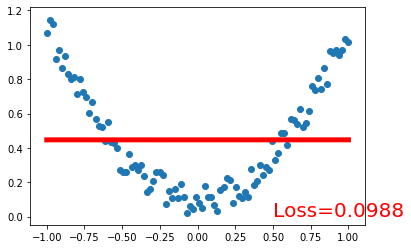

tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)


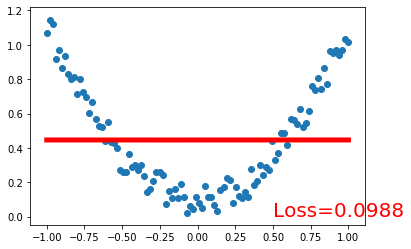

tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)


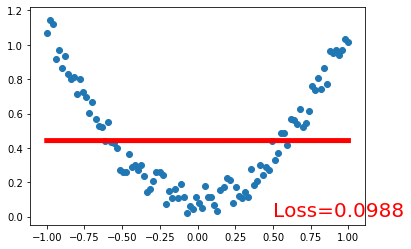

tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)


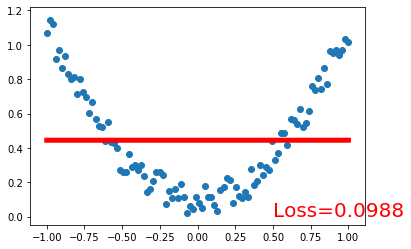

tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)


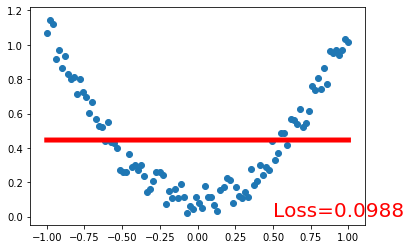

tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)


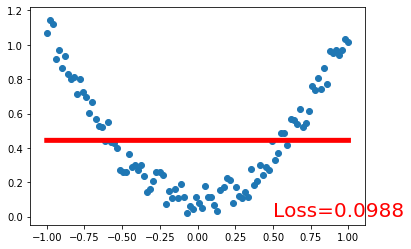

tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)


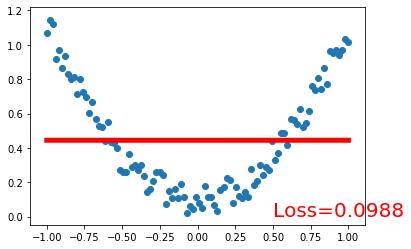

tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)


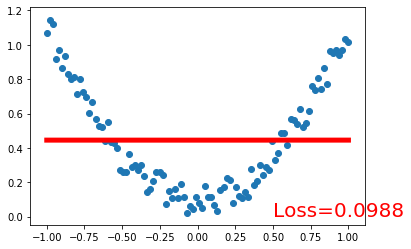

tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)


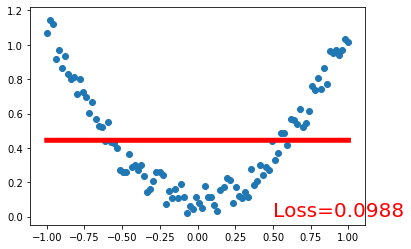

tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)


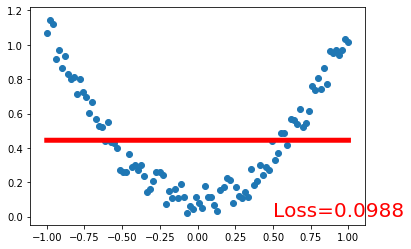

tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)


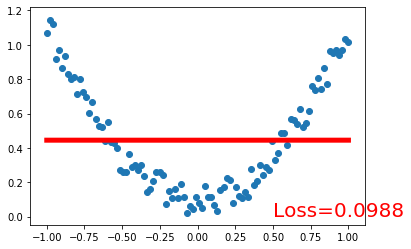

tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)


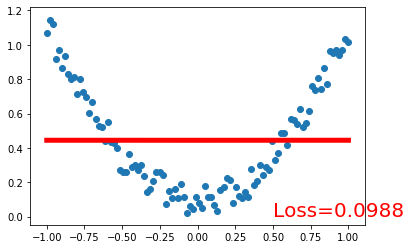

tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)


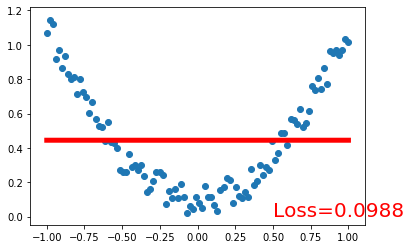

tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)


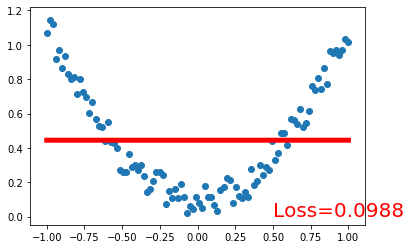

tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)


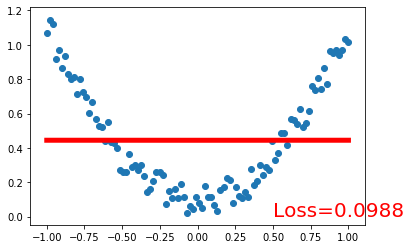

tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)


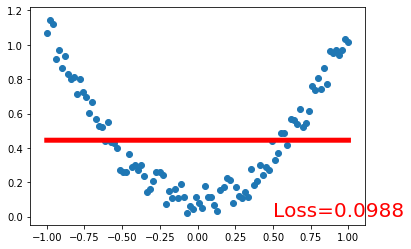

tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)


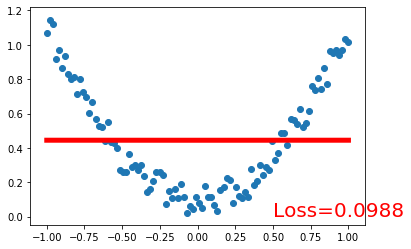

tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)


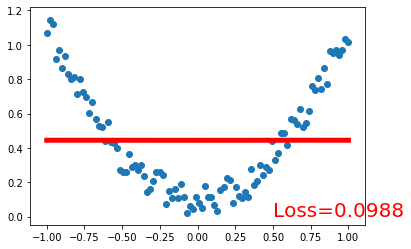

tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)


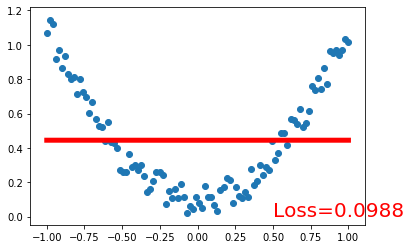

tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)


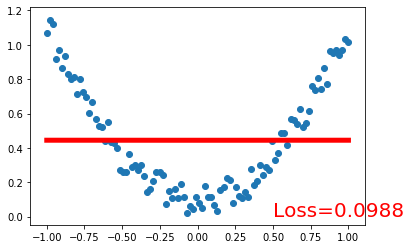

tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)


In [36]:
# %matplotlib
#optimizer 是训练的工具
optimizer = torch.optim.Adam(net.parameters(), lr=0.2,betas=(0.9, 0.99))  # 传入 net 的所有参数, 学习率
loss_func = nn.MSELoss()      # 预测值和真实值的误差计算公式 (均方差)
# %matplotlib inline
plt.ion()   # 画图
plt.show()

for t in range(200):
    prediction = net(x)     # 喂给 net 训练数据 x, 输出预测值
    loss = loss_func(prediction, y)     # 计算两者的误差
    print(loss)
    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()   

    # 接着上面来
    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

torch.Size([100, 1])

In [199]:
out

tensor(27., grad_fn=<MeanBackward1>)

In [212]:
x = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
loss.backward()
print(loss)

tensor(1.1688, grad_fn=<MseLossBackward>)


In [209]:
out

tensor(1.2762)